In [1]:
from __future__ import division, print_function
import os
import argparse
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
import tensorflow as tf
import keras.backend as K
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import OneHotEncoder

from learning2learn.models import simple_cnn
from learning2learn.wrangle import synthesize_data
from learning2learn.wrangle import get_train_test_parameters
from learning2learn.wrangle import build_train_set
from learning2learn.wrangle import build_test_trials_O2
from learning2learn.util import train_model
from learning2learn.util import train_test_split
from learning2learn.util import evaluate_generalization

/home/feinman/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
gpu_options = tf.GPUOptions(
    allow_growth=True,
    visible_device_list='1'
)
sess = tf.Session(
    config=tf.ConfigProto(gpu_options=gpu_options)
)
K.set_session(sess)

In [3]:
nb_categories = 50
nb_exemplars = 18
batch_size = min(32, int(np.floor(nb_categories*nb_exemplars/5)))

# Baseline model... train model for shape, as per standard

In [4]:
np.random.seed(0)
# get dataset
df_train = synthesize_data(nb_categories, nb_exemplars)
ohe = OneHotEncoder(sparse=False)
Y_train = ohe.fit_transform(df_train['shape'].values.reshape(-1, 1))
# get parameters
(shape_set_train, shape_set_test), \
(color_set_train, color_set_test), \
(texture_set_train, texture_set_test) = \
    get_train_test_parameters(images=True, img_size=200)
# select subset of parameters
if nb_categories < 50:
    shape_set_train, _ = train_test_split(shape_set_train, 50-nb_categories)
    color_set_train, _ = train_test_split(color_set_train, 50-nb_categories)
    texture_set_train, _ = train_test_split(texture_set_train, 50-nb_categories)

In [5]:
# build training images
X_train = build_train_set(
    df_train, shape_set_train, color_set_train,
    texture_set_train, target_size=(200, 200),
    shift_scale=20
)

In [6]:
# Build the 2nd-order test set trials
X_test_O2 = build_test_trials_O2(
    shape_set_test, color_set_test, texture_set_test,
    nb_trials=1000, target_size=(200, 200),
    shift_scale=20
)

In [7]:
# Build a neural network model and train it with the training set
model = simple_cnn(
    input_shape=X_train.shape[1:],
    nb_classes=Y_train.shape[-1]
)

In [8]:
weights_file = '../data/temp.h5'
if os.path.isfile(weights_file):
    os.remove(weights_file)
checkpoint = ModelCheckpoint(
    weights_file,
    monitor='loss',
    save_best_only=True,
    save_weights_only=True,
    period=2
)
train_model(
    model, X_train, Y_train, epochs=400,
    validation_data=None, batch_size=batch_size,
    checkpoint=checkpoint, burn_period=50
)
model.load_weights(weights_file)

Epoch 1/50
900/900 [==============================] - 2s 3ms/step - loss: 4.3486 - acc: 0.0133
Epoch 2/50
900/900 [==============================] - 1s 1ms/step - loss: 4.1943 - acc: 0.0133
Epoch 3/50
900/900 [==============================] - 1s 1ms/step - loss: 4.0961 - acc: 0.0211
Epoch 4/50
900/900 [==============================] - 1s 1ms/step - loss: 4.0370 - acc: 0.0244
Epoch 5/50
900/900 [==============================] - 1s 1ms/step - loss: 3.9926 - acc: 0.0267
Epoch 6/50
900/900 [==============================] - 1s 1ms/step - loss: 3.9546 - acc: 0.0489
Epoch 7/50
900/900 [==============================] - 1s 1ms/step - loss: 3.9219 - acc: 0.0400
Epoch 8/50
900/900 [==============================] - 1s 1ms/step - loss: 3.8445 - acc: 0.0689
Epoch 9/50
900/900 [==============================] - 1s 1ms/step - loss: 3.7564 - acc: 0.0878
Epoch 10/50
900/900 [==============================] - 1s 1ms/step - loss: 3.6759 - acc: 0.1122
Epoch 11/50
900/900 [============================

900/900 [==============================] - 1s 1ms/step - loss: 1.0598 - acc: 0.7344
Epoch 120/350
900/900 [==============================] - 1s 1ms/step - loss: 1.0232 - acc: 0.7567
Epoch 121/350
900/900 [==============================] - 1s 1ms/step - loss: 1.0775 - acc: 0.7144
Epoch 122/350
900/900 [==============================] - 1s 1ms/step - loss: 1.0803 - acc: 0.7189
Epoch 123/350
900/900 [==============================] - 1s 1ms/step - loss: 1.1318 - acc: 0.6967
Epoch 124/350
900/900 [==============================] - 1s 1ms/step - loss: 1.0784 - acc: 0.7200
Epoch 125/350
900/900 [==============================] - 1s 1ms/step - loss: 1.0586 - acc: 0.7144
Epoch 126/350
900/900 [==============================] - 1s 1ms/step - loss: 1.1150 - acc: 0.7156
Epoch 127/350
900/900 [==============================] - 1s 1ms/step - loss: 1.0432 - acc: 0.7378
Epoch 128/350
900/900 [==============================] - 1s 1ms/step - loss: 1.0166 - acc: 0.7556
Epoch 129/350
900/900 [===========

900/900 [==============================] - 1s 1ms/step - loss: 0.9089 - acc: 0.7744
Epoch 290/350
900/900 [==============================] - 1s 1ms/step - loss: 0.8676 - acc: 0.7956
Epoch 291/350
900/900 [==============================] - 1s 1ms/step - loss: 0.9456 - acc: 0.7600
Epoch 292/350
900/900 [==============================] - 1s 1ms/step - loss: 0.8935 - acc: 0.7811
Epoch 293/350
900/900 [==============================] - 1s 1ms/step - loss: 0.8429 - acc: 0.7933
Epoch 294/350
900/900 [==============================] - 1s 1ms/step - loss: 0.9282 - acc: 0.7722
Epoch 295/350
900/900 [==============================] - 1s 1ms/step - loss: 0.8970 - acc: 0.7800
Epoch 296/350
900/900 [==============================] - 1s 1ms/step - loss: 0.9496 - acc: 0.7633
Epoch 297/350
900/900 [==============================] - 1s 1ms/step - loss: 0.8740 - acc: 0.7856
Epoch 298/350
900/900 [==============================] - 1s 1ms/step - loss: 0.9424 - acc: 0.7744
Epoch 299/350
900/900 [===========

In [11]:
scores = evaluate_generalization(
    model, X_test_O2, layer_num=-4,
    batch_size=128
)
print('score shape: %0.4f' % scores['shape'])
print('score color: %0.4f' % scores['color'])
print('score texture: %0.4f' % scores['texture'])

score shape: 0.9540
score color: 0.0250
score texture: 0.0210


In [12]:
weights, biases = model.layers[0].get_weights()
print(weights.shape)
print(biases.shape)

(5, 5, 4, 5)
(5,)


In [19]:
def visualize_filter(w, rgb=False, save_file=None):
    nb_filters = weights.shape[-1]
    # scale to range 0-1
    filt = w - w.min()
    filt /= filt.max()
    if rgb:
        fig, axes = plt.subplots(nrows=nb_filters, ncols=1, figsize=(1,5))
        for i in range(nb_filters):
            axes[i].imshow(filt[:,:,:3,i], vmin=0, vmax=1)
            axes[i].axis('off')
    else:
        # visualize
        fig, axes = plt.subplots(nrows=nb_filters, ncols=3, figsize=(3,5))
        for i in range(nb_filters): # loop through all filters
            for j in range(3): # loop through RGB channels
                axes[i,j].imshow(filt[:,:,j,i], vmin=0., vmax=1., cmap='gray')
                axes[i,j].axis('off')
    if save_file is not None:
        plt.savefig(
            save_file, 
            format='pdf',
            bbox_inches='tight'
        )
    else:
        plt.show()

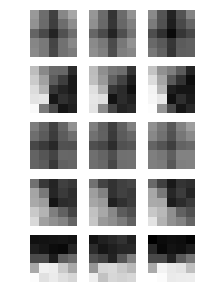

In [20]:
visualize_filter(weights, rgb=False, save_file='../results/filters_shape.pdf')

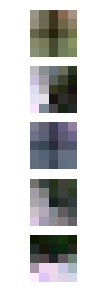

In [21]:
visualize_filter(weights, rgb=True, save_file='../results/filters_shape_rgb.pdf')

# Now try training model for color

In [22]:
ohe = OneHotEncoder(sparse=False)
Y_train_color = ohe.fit_transform(df_train['color'].values.reshape(-1, 1))

In [29]:
# Build a neural network model and train it with the training set
model_color = simple_cnn(
    input_shape=X_train.shape[1:],
    nb_classes=Y_train_color.shape[-1]
)

In [30]:
weights_file = '../data/temp_c.h5'
if os.path.isfile(weights_file):
    os.remove(weights_file)
checkpoint = ModelCheckpoint(
    weights_file,
    monitor='loss',
    save_best_only=True,
    save_weights_only=True,
    period=2
)
train_model(
    model_color, X_train, Y_train_color, epochs=400,
    validation_data=None, batch_size=batch_size,
    checkpoint=checkpoint, burn_period=50
)
model_color.load_weights(weights_file)

Epoch 1/50
900/900 [==============================] - 1s 2ms/step - loss: 4.3855 - acc: 0.0133
Epoch 2/50
900/900 [==============================] - 1s 1ms/step - loss: 4.1983 - acc: 0.0211
Epoch 3/50
900/900 [==============================] - 1s 1ms/step - loss: 4.0965 - acc: 0.0178
Epoch 4/50
900/900 [==============================] - 1s 1ms/step - loss: 4.0179 - acc: 0.0144
Epoch 5/50
900/900 [==============================] - 1s 1ms/step - loss: 3.9223 - acc: 0.0356
Epoch 6/50
900/900 [==============================] - 1s 1ms/step - loss: 3.8402 - acc: 0.0433
Epoch 7/50
900/900 [==============================] - 1s 1ms/step - loss: 3.7771 - acc: 0.0633
Epoch 8/50
900/900 [==============================] - 1s 1ms/step - loss: 3.7447 - acc: 0.0500
Epoch 9/50
900/900 [==============================] - 1s 1ms/step - loss: 3.6743 - acc: 0.0578
Epoch 10/50
900/900 [==============================] - 1s 1ms/step - loss: 3.5964 - acc: 0.0644
Epoch 11/50
900/900 [============================

900/900 [==============================] - 1s 1ms/step - loss: 1.1267 - acc: 0.6744
Epoch 121/350
900/900 [==============================] - 1s 1ms/step - loss: 1.1513 - acc: 0.6567
Epoch 122/350
900/900 [==============================] - 1s 1ms/step - loss: 1.1702 - acc: 0.6367
Epoch 123/350
900/900 [==============================] - 1s 1ms/step - loss: 1.1641 - acc: 0.6367
Epoch 124/350
900/900 [==============================] - 1s 1ms/step - loss: 1.1256 - acc: 0.6644
Epoch 125/350
900/900 [==============================] - 1s 1ms/step - loss: 1.1644 - acc: 0.6533
Epoch 126/350
900/900 [==============================] - 1s 1ms/step - loss: 1.1406 - acc: 0.6667
Epoch 127/350
900/900 [==============================] - 1s 1ms/step - loss: 1.1651 - acc: 0.6522
Epoch 128/350
900/900 [==============================] - 1s 1ms/step - loss: 1.1836 - acc: 0.6244
Epoch 129/350
900/900 [==============================] - 1s 1ms/step - loss: 1.1615 - acc: 0.6400
Epoch 130/350
900/900 [===========

900/900 [==============================] - 1s 1ms/step - loss: 1.0534 - acc: 0.6567
Epoch 287/350
900/900 [==============================] - 1s 1ms/step - loss: 0.9892 - acc: 0.6833
Epoch 288/350
900/900 [==============================] - 1s 1ms/step - loss: 1.0256 - acc: 0.6700
Epoch 289/350
900/900 [==============================] - 1s 1ms/step - loss: 1.0419 - acc: 0.6600
Epoch 290/350
900/900 [==============================] - 1s 1ms/step - loss: 0.9993 - acc: 0.6767
Epoch 291/350
900/900 [==============================] - 1s 1ms/step - loss: 0.9955 - acc: 0.7011
Epoch 292/350
900/900 [==============================] - 1s 1ms/step - loss: 0.9935 - acc: 0.6911
Epoch 293/350
900/900 [==============================] - 1s 1ms/step - loss: 0.9962 - acc: 0.7044
Epoch 294/350
900/900 [==============================] - 1s 1ms/step - loss: 0.9739 - acc: 0.7056
Epoch 295/350
900/900 [==============================] - 1s 1ms/step - loss: 0.9916 - acc: 0.6922
Epoch 296/350
900/900 [===========

In [31]:
scores_color = evaluate_generalization(
    model_color, X_test_O2, layer_num=-4,
    batch_size=128
)
print('score shape: %0.4f' % scores_color['shape'])
print('score color: %0.4f' % scores_color['color'])
print('score texture: %0.4f' % scores_color['texture'])

score shape: 0.0000
score color: 1.0000
score texture: 0.0000


In [32]:
weights, biases = model_color.layers[0].get_weights()
print(weights.shape)
print(biases.shape)

(5, 5, 4, 5)
(5,)


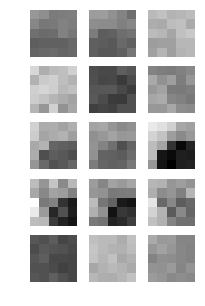

In [36]:
visualize_filter(weights, rgb=False, save_file='../results/filters_color.pdf')

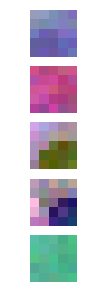

In [35]:
visualize_filter(weights, rgb=True, save_file='../results/filters_color_rgb.pdf')

# Deep Dreaming-style visualization

In [57]:
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

#     # convert to RGB array
#     x *= 255
#     x = x.transpose((1, 2, 0))
#     x = np.clip(x, 0, 255).astype('uint8')
    return x

In [33]:
[layer.name for layer in model.layers]

['conv2d_1',
 'activation_1',
 'max_pooling2d_1',
 'conv2d_2',
 'activation_2',
 'max_pooling2d_2',
 'flatten_1',
 'dropout_1',
 'dense_1',
 'activation_3',
 'dropout_2',
 'dense_2',
 'activation_4']

In [39]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [58]:
# Now let's define a loss function that will seek to maximize the activation 
# of a specific filter (filter_index) in a specific layer (layer_name). We do 
# this via a Keras backend function.

step = 1. # step size for gradient ascent
input_img = model.input # placeholder for the model input
layer_name = 'conv2d_1' # the layer we'd like to visualize
filter_index = 0  # can be any integer from 0 to 4

# build a loss function that maximizes the activation
# of the nth filter of the layer considered
layer_output = layer_dict[layer_name].output
loss = K.mean(layer_output[:, :, :, filter_index])

# compute the gradient of the input picture wrt this loss
grads = K.gradients(loss, input_img)[0]

# normalization trick: we normalize the gradient
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

# this function returns the loss and grads given the input picture
iterate = K.function([input_img], [loss, grads])

In [59]:
# we start from a gray image with some noise
input_img_data = np.random.random((1, 200, 200, 4)) * 20 + 128.
# run gradient ascent for 20 steps
for i in range(20):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step
    
img = input_img_data[0]
img = deprocess_image(img)